In [ ]:
from google.colab import drive
import sys, os
import warnings 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# this block used to import modules
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import json 
import datetime
from matplotlib.pyplot import figure

Keys in each nfl tweet (json) object 

['firstpost_date', 'title', 'url', 'tweet', 'author', 'original_author', 'citation_date', 'metrics', 'highlight', 'type', 'citation_url']

In [ ]:
date_string = '2015-02-1 23:30:00'
date_obj = datetime.datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
unixtime = int(date_obj.timestamp())
print(unixtime)

1422833400


In [ ]:
date_string = '2015-02-2 3:06:00'
date_obj = datetime.datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
unixtimeEnd = int(date_obj.timestamp())
print(unixtimeEnd)

1422846360


In [ ]:
# 'drive/Shareddrives/ECE219_P4/ECE219_tweet_data/tweets_#nfl.txt'
def get_dataframe(filepath):
  with open(filepath) as f:
    data = []
    for i in f.readlines():
      curr_dic = {}
      curr_tweet = json.loads(i) # parse each tweet into a json object
      # tweet_time = datetime.datetime.fromtimestamp(curr_tweet['citation_date'])
      curr_dic['citation_date'] = curr_tweet['citation_date']
      curr_dic['num_retweets'] = int(curr_tweet['metrics']['citations']['total'])
      curr_dic['num_followers'] = int(curr_tweet['author']['followers'])
      data.append(curr_dic)
    df = pd.DataFrame.from_dict(data)
    return df

In [ ]:
def get_stats(df):
  citation_dates = df['citation_date']
  citation_dates_max = citation_dates.max()
  citation_dates_min = citation_dates.min()
  avg_num_tweets_per_hour = df.shape[0] / ((citation_dates_max - citation_dates_min) / 3600.0)
  avg_num_retweets = df['num_retweets'].mean()
  avg_num_followers = df['num_followers'].mean()
  print("The Average Number of Tweets Per Hour is:", str(avg_num_tweets_per_hour))
  print("The Average Number of Followers of Users Posting the Tweets Per Tweet is:", str(avg_num_followers))
  print("The Average Number of Retweets Per Tweet is:", str(avg_num_retweets))

In [ ]:
def plot_avg_tweets_per_hour(df):
  citation_dates = df['citation_date']
  citation_dates_max = citation_dates.max()
  citation_dates_min = citation_dates.min()
  bins = range(citation_dates_min, citation_dates_max, 3600)
  labels = ['[{0}, {1})'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)]  # define the bin labels
  df['bin'] = pd.cut(citation_dates, bins=bins, labels=labels)
  grouped = df.groupby('bin').size().reset_index(name='count')
  plt.plot(grouped['count'])
  plt.title("Number of Tweets in Hour Over Time")
  plt.xlabel("i_th hour")
  plt.ylabel("Number of Tweets")
  plt.show()

## For #nfl 

In [ ]:
nfl_df = get_dataframe('drive/Shareddrives/ECE219_P4/ECE219_tweet_data/tweets_#nfl.txt')

In [ ]:
get_stats(nfl_df)

The Average Number of Tweets Per Hour is: 397.0213901819841
The Average Number of Followers of Users Posting the Tweets Per Tweet is: 4662.37544523693
The Average Number of Retweets Per Tweet is: 1.5344602655543254


## For #gohawks

In [ ]:
gohawks_df = get_dataframe('drive/Shareddrives/ECE219_P4/ECE219_tweet_data/tweets_#gohawks.txt')

In [ ]:
get_stats(gohawks_df)

The Average Number of Tweets Per Hour is: 292.48785062173687
The Average Number of Followers of Users Posting the Tweets Per Tweet is: 2217.9237355281984
The Average Number of Retweets Per Tweet is: 2.0132093991319877


## For #gopatriots

In [ ]:
gopatriots_df = get_dataframe('drive/Shareddrives/ECE219_P4/ECE219_tweet_data/tweets_#gopatriots.txt')

In [ ]:
get_stats(gopatriots_df)

The Average Number of Tweets Per Hour is: 40.95469800606194
The Average Number of Followers of Users Posting the Tweets Per Tweet is: 1427.2526051635405
The Average Number of Retweets Per Tweet is: 1.4081919101697078


## For #patriots

In [ ]:
patriots_df = get_dataframe('drive/Shareddrives/ECE219_P4/ECE219_tweet_data/tweets_#patriots.txt')

In [ ]:
get_stats(patriots_df)

The Average Number of Tweets Per Hour is: 750.89426460689
The Average Number of Followers of Users Posting the Tweets Per Tweet is: 3280.4635616550277
The Average Number of Retweets Per Tweet is: 1.7852871288476946


## For #sb49

In [ ]:
sb49_df = get_dataframe('drive/Shareddrives/ECE219_P4/ECE219_tweet_data/tweets_#sb49.txt')

In [ ]:
get_stats(sb49_df)

The Average Number of Tweets Per Hour is: 1276.8570598680474
The Average Number of Followers of Users Posting the Tweets Per Tweet is: 10374.160292019487
The Average Number of Retweets Per Tweet is: 2.52713444111402


## For #superbowl

In [ ]:
superbowl_df = get_dataframe('drive/Shareddrives/ECE219_P4/ECE219_tweet_data/tweets_#superbowl.txt')

In [ ]:
get_stats(superbowl_df)

The Average Number of Tweets Per Hour is: 2072.11840170408
The Average Number of Followers of Users Posting the Tweets Per Tweet is: 8814.96799424623
The Average Number of Retweets Per Tweet is: 2.3911895819207736


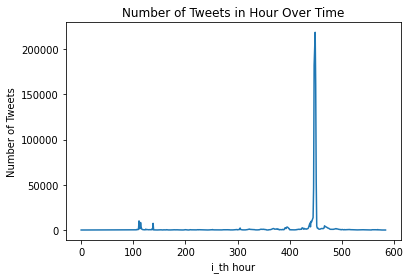

In [ ]:
plot_avg_tweets_per_hour(superbowl_df)

In [ ]:
len(nfl_df)

233022

In [ ]:
len(gohawks_df)

169122

In [ ]:
len(sb49_df)

743649

In [ ]:
len(superbowl_df)

1213813

## Tweets Task: 

Goal: Given a specific tweet posted during the game session, we can predict the team which is ahead on the scorecard.

###1. Data Selection: 
In our designed task, our goal is to predict winning team based on a given tweet. The first thing we will do is to select the tweets within the game session period.
1. First, we will convert 'citation_date' to datetime format based on LA time.
2. Then we will do a range selection to choose only tweets between Feb 1 15:00 to 19:10 local time in LA.
3. The last step will be doing a random sampling(50,000rows) on the data, because our original data will be too large (400,000rows) which will be problematic for later training. 

In [ ]:
import pytz

In [ ]:
def get_dataframe(filepath):
    with open(filepath) as f:
        data = []
        count = 0
        pst_tz = pytz.timezone('America/Los_Angeles')
        dt1 = datetime.datetime(2015, 2, 1, 15, 0, 0)
        dt2 = datetime.datetime(2015, 2, 1, 19, 10, 0)
        # The start time is about 15:32 in LA
        # The end time is about 19:10 in LA
        start_time = pst_tz.localize(dt1) 
        end_time = pst_tz.localize(dt2)
        for i in f.readlines():
            count += 1
            curr_dic = {}
            curr_tweet = json.loads(i)   
            if (curr_tweet['tweet']['lang'] == 'en' 
                and (start_time < datetime.datetime.fromtimestamp(int(curr_tweet['citation_date']), pst_tz) < end_time)):
                curr_dic['citation_date'] = datetime.datetime.fromtimestamp(int(curr_tweet['citation_date']), pst_tz)
                curr_dic['tweet'] = curr_tweet['title']
                curr_dic['num_retweets'] = int(curr_tweet['metrics']['citations']['total'])
                curr_dic['num_followers'] = int(curr_tweet['author']['followers'])
                data.append(curr_dic)
    df = pd.DataFrame.from_dict(data)
    return df

In [ ]:
%%time
sb_df = get_dataframe('drive/Shareddrives/ECE219_P4/ECE219_tweet_data/tweets_#superbowl.txt')

CPU times: user 1min 24s, sys: 3.36 s, total: 1min 28s
Wall time: 1min 54s


In [ ]:
sb_df.sort_values('citation_date').head()

,citation_date,tweet,num_retweets,num_followers
1407,2015-02-01 15:00:01-08:00,It's almost time #SuperBowl,1,1307
1401,2015-02-01 15:00:01-08:00,#bedford #superbowl fans join us tommorrow mo...,2,3644
1403,2015-02-01 15:00:01-08:00,Who are YOU rooting for? #SuperBowl http://t.c...,1,43
1404,2015-02-01 15:00:01-08:00,"Finally, it's time! .. #SuperBowl #SEAvsNE",1,127
1405,2015-02-01 15:00:01-08:00,The PERFECT news for #SuperBowl Sunday: http:/...,1,1456


### Time-Score Pairing：
We will be recording the winning team based on the corresponding time, the specific time intervals are based on the information provided by http://superadsdb.com/2015/timeline.

In [ ]:
"""
Given a datetime object -> return the real time winner:
0 for draw, 1 for NE, 2 for SEA
"""
def real_time_scoring(timestamp):
    pst_tz = pytz.timezone('America/Los_Angeles')
    dt1 = datetime.datetime(2015, 2, 1, 16, 11, 0)
    dt2 = datetime.datetime(2015, 2, 1, 16, 32, 0)
    dt3 = datetime.datetime(2015, 2, 1, 16, 47, 0)
    dt4 = datetime.datetime(2015, 2, 1, 16, 58, 0)
    dt5 = datetime.datetime(2015, 2, 1, 17, 37, 0)
    dt6 = datetime.datetime(2015, 2, 1, 18, 47, 0)
    dt7 = datetime.datetime(2015, 2, 1, 19, 6, 0)

    # before 
    if timestamp < pst_tz.localize(dt1):
        return 0
    # between 16:11 and 16:32 -> score_lead: NE
    elif pst_tz.localize(dt1) < timestamp < pst_tz.localize(dt2):
        return 1
    # between 16:32 and 16:47 -> score_lead: draw
    elif pst_tz.localize(dt2) < timestamp < pst_tz.localize(dt3):
        return 0
    # between 16:47 and 16:58 -> score_lead: NE
    elif pst_tz.localize(dt3) < timestamp < pst_tz.localize(dt4):
        return 1
    # between 16:58 and 17:37 -> score_lead: draw
    elif pst_tz.localize(dt4) < timestamp < pst_tz.localize(dt5):
        return 0
    # between 17:37 and 18:47 -> score_lead: SEA
    elif pst_tz.localize(dt5) < timestamp < pst_tz.localize(dt6):
        return 2
    # between 18:47 and 19:06 -> score_lead: NE
    # elif pst_tz.localize(dt6) < timestamp <= pst_tz.localize(dt7):
    else:
        return 1

In [ ]:
%%time
sb_df['score_lead'] = sb_df['citation_date'].apply(real_time_scoring)

CPU times: user 1min 34s, sys: 289 ms, total: 1min 34s
Wall time: 1min 35s


In [ ]:
sb_df = sb_df.sample(n = 50000, random_state=42)

In [ ]:
sb_df['score_lead'].value_counts()

0    28444
1    12238
2     9318
Name: score_lead, dtype: int64

In [ ]:
sb_df[['citation_date', 'tweet','score_lead']].head(10)

,citation_date,tweet,score_lead
400919,2015-02-01 17:29:18-08:00,Yep twas short 4 @LennyKravitz at the #SuperBo...,0
599763,2015-02-01 19:08:45-08:00,Well that was one heck of a game! Couldn't bel...,1
41981,2015-02-01 15:21:43-08:00,Go Patrihawks! #SuperBowl,0
495180,2015-02-01 18:19:14-08:00,Black God knows the struggle! Haha I love it! ...,2
240715,2015-02-01 16:41:48-08:00,Goats are always relevant! #superbowlcommercials,0
417210,2015-02-01 17:35:36-08:00,Matthews on fire #SuperBowlXLIX #SEAvsNE,0
584516,2015-02-01 19:05:25-08:00,Well that just ruined my adrenaline buzz. #sup...,1
364387,2015-02-01 17:21:53-08:00,Missy could have done the half time show by he...,0
208063,2015-02-01 16:30:30-08:00,Thanks for totally bumming us out Nationwide. ...,1
591991,2015-02-01 19:07:02-08:00,#SuperBowlXLIX Wow. All we needed was for Lync...,1


###2. Text Cleaning:
Now we have put all the needed tweets inside the dataframe, it's time to do some basic cleaning. As we can see there are many unneeded things such as punctuation, special notations, emojis, hashtags and so on.

In [ ]:
"""
remove all the # @ emoji and other punctuations
"""
import re
def clean(text):
        texter = re.sub(r'https?://\S+', '', text) 
        texter = re.sub(r'[a-zA-Z]', lambda x: x.group(0).lower(), texter)
        texter = re.sub(r"superbowl\w*", "", texter, flags=re.IGNORECASE)
        texter = re.sub(r"sb49\w*", "", texter, flags=re.IGNORECASE)
        texter = re.sub(r"commercial\w*", "", texter, flags=re.IGNORECASE)
        texter = re.sub(r"katyperry\w*", "", texter, flags=re.IGNORECASE)
        texter = re.sub(r"game\w*", "", texter, flags=re.IGNORECASE)
        texter = re.sub(r'#(\w+)', r'\1', texter)
        texter = re.sub(r'[^\w\s]|_', '', texter)
        texter = re.sub(r'[^\x00-\x7F]+', '', texter)
        texter = re.sub(r"<br />", " ", texter)
        texter = re.sub(r"&quot;", "\"",texter)
        texter = re.sub('&#39;', "\"", texter)
        texter = re.sub('\n', " ", texter)
        texter = re.sub(' u '," you ", texter)
        texter = re.sub('`',"", texter)
        texter = re.sub(' +', ' ', texter)
        texter = re.sub(r"(!)\1+", r"!", texter)
        texter = re.sub(r"(\?)\1+", r"?", texter)
        texter = re.sub('&amp;', 'and', texter)
        texter = re.sub('\r', ' ',texter)
        clean = re.compile('<.*?>')
        texter = texter.encode('ascii', 'ignore').decode('ascii')
        texter = re.sub(clean, '', texter)
        if texter == "":
            texter = ""
        return texter

In [ ]:
sb_df['clean_tweet'] = sb_df['tweet'].apply(clean)

In [ ]:
sb_df[['tweet', 'clean_tweet','score_lead']].head(10)

,tweet,clean_tweet,score_lead
400919,Yep twas short 4 @LennyKravitz at the #SuperBo...,yep twas short 4 lennykravitz at the still che...,0
599763,Well that was one heck of a game! Couldn't bel...,well that was one heck of a couldnt believe th...,1
41981,Go Patrihawks! #SuperBowl,go patrihawks,0
495180,Black God knows the struggle! Haha I love it! ...,black god knows the struggle haha i love it,2
240715,Goats are always relevant! #superbowlcommercials,goats are always relevant,0
417210,Matthews on fire #SuperBowlXLIX #SEAvsNE,matthews on fire seavsne,0
584516,Well that just ruined my adrenaline buzz. #sup...,well that just ruined my adrenaline buzz fight,1
364387,Missy could have done the half time show by he...,missy could have done the half time show by he...,0
208063,Thanks for totally bumming us out Nationwide. ...,thanks for totally bumming us out nationwide,1
591991,#SuperBowlXLIX Wow. All we needed was for Lync...,wow all we needed was for lynch to run the ba...,1


### 2. Lemmetization:
After removing the unnecessary words from the data, we can lemmetize/stem the text to get even better information.

In [ ]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string 

In [ ]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    wordnet_tags = {'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV, 'J': wordnet.ADJ}
    lemmatized_tokens = [lemmatizer.lemmatize(token, wordnet_tags.get(pos[0], wordnet.NOUN)) for token, pos in pos_tags]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [ ]:
%%time
sb_df['lemmatized_tweet'] = sb_df['clean_tweet'].apply(lemmatize)

CPU times: user 49.5 s, sys: 861 ms, total: 50.4 s
Wall time: 50.8 s


In [ ]:
sb_df[['clean_tweet','lemmatized_tweet']].head(10)

,clean_tweet,lemmatized_tweet
400919,yep twas short 4 lennykravitz at the still che...,yep twas short 4 lennykravitz at the still che...
599763,well that was one heck of a couldnt believe th...,well that be one heck of a couldnt believe tha...
41981,go patrihawks,go patrihawks
495180,black god knows the struggle haha i love it,black god know the struggle haha i love it
240715,goats are always relevant,goat be always relevant
417210,matthews on fire seavsne,matthew on fire seavsne
584516,well that just ruined my adrenaline buzz fight,well that just ruin my adrenaline buzz fight
364387,missy could have done the half time show by he...,missy could have do the half time show by hers...
208063,thanks for totally bumming us out nationwide,thanks for totally bum u out nationwide
591991,wow all we needed was for lynch to run the ba...,wow all we need be for lynch to run the ball i...


### Text Exploration:
After doing the lemmatization, we have the clean text. Now we can take a look at the most common words in each time period.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

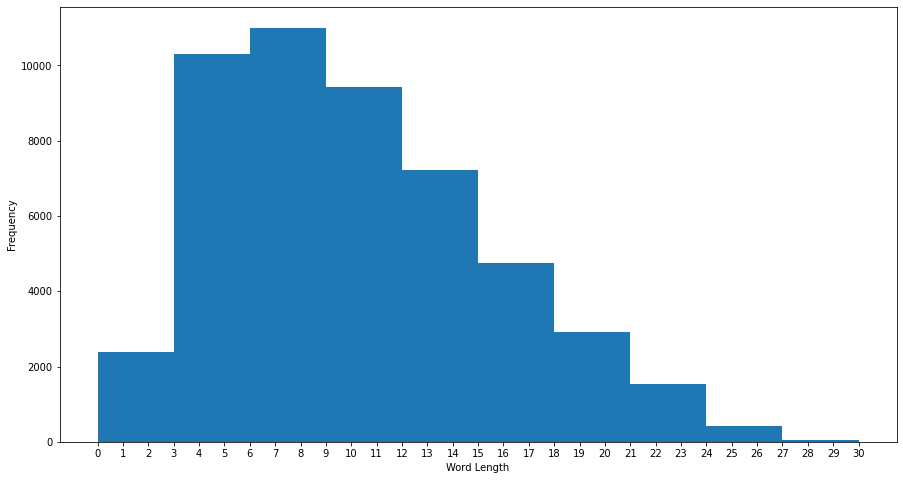

In [ ]:
sb_df['word_length'] = sb_df['lemmatized_tweet'].apply(lambda x: len(x.split()))

# plot frequency of word lengths
fig = plt.figure(figsize=(15, 8))
plt.hist(sb_df['word_length'])
plt.xticks(range(sb_df['word_length'].min(), sb_df['word_length'].max()+1))
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()


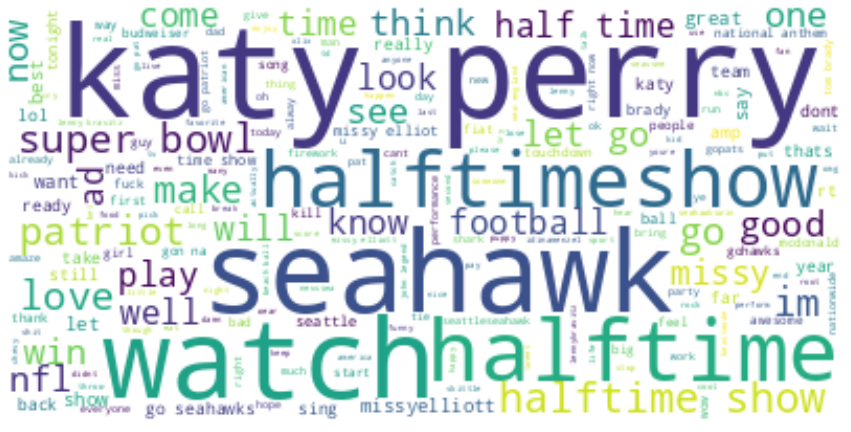

In [ ]:
draw_text_data = ' '.join(sb_df.loc[sb_df['score_lead'] == 0]['lemmatized_tweet'].astype(str))

wc1 = WordCloud(background_color="white")
wc1.generate(draw_text_data)

fig = plt.figure(figsize=(15, 8))

plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

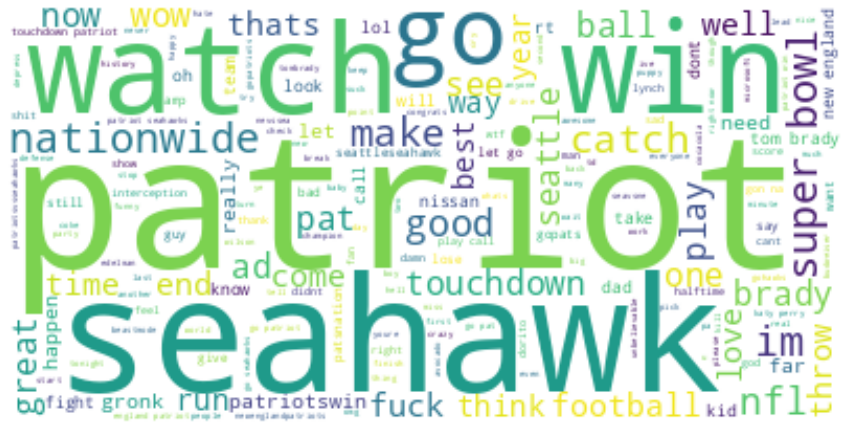

In [ ]:
NE_text_data = ' '.join(sb_df.loc[sb_df['score_lead'] == 1]['lemmatized_tweet'].astype(str))

wc2 = WordCloud(background_color="white")
wc1.generate(NE_text_data)

fig = plt.figure(figsize=(15, 8))

plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

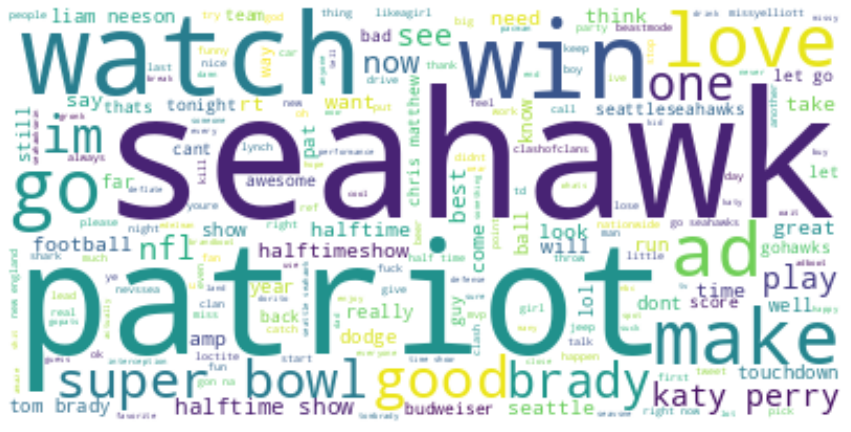

In [ ]:
SEA_text_data = ' '.join(sb_df.loc[sb_df['score_lead'] == 2]['lemmatized_tweet'].astype(str))

wc = WordCloud(background_color="white")
wc.generate(SEA_text_data)

fig = plt.figure(figsize=(15, 8))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3. TF-IDF:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [ ]:
train, test = train_test_split(sb_df[["lemmatized_tweet", "score_lead"]], test_size = 0.2, shuffle = True)

In [ ]:
# We first do the vectorization:
tfidf_Vectorizer = TfidfVectorizer(stop_words = 'english')
X_train = tfidf_Vectorizer.fit_transform(train['lemmatized_tweet'])
X_test = tfidf_Vectorizer.transform(test['lemmatized_tweet'])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

In [ ]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(40000, 26665)
(10000, 26665)


### Dimensionality Reduction:
Notice we have about 27868 columns of features. This will be unnecessary, as there will be many features to be useless and take a lot of time to run.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.utils.extmath import randomized_svd

In [ ]:
# 1. We begin by using LSI
# %%time
# LSI = TruncatedSVD(n_components= 2000, random_state=42)
# train_LSI = LSI.fit_transform(X_train_tfidf)
# test_LSI = LSI.transform(X_test_tfidf)

In [ ]:
# train_LSI.shape

NameError: ignored

In [ ]:
# 2. We have a NMF ready as well


###5. Model Selection:

In [ ]:
def get_stats(label, pred_label):
    print("confusion matrix \n", confusion_matrix(label, pred_label))
    print("accuracy score: ", accuracy_score(label, pred_label))
    print("recall score: ", recall_score(label, pred_label, average="weighted"))
    print("precision score: ", precision_score(label, pred_label, average="weighted"))
    print("f1 score: ", f1_score(label, pred_label, average="weighted"))
    print("-"*40)

# plot the receiver operating characteristic (ROC) curve
def plot_roc(label, decision_function):
    fpr, tpr, thresholds = roc_curve(label, decision_function, pos_label = 1)
    fig, ax = plt.subplots()
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)
    ax.grid(color='0.7', linestyle='--', linewidth=1)
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.legend(loc="lower right")
    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
    plt.show()

1. Decision Tree:

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, roc_curve

In [ ]:
%%time
oversampler = RandomOverSampler(random_state=42)

for i in [100, 300, 1000, 2000]:
    LSI = TruncatedSVD(n_components=i, random_state=42)
    # Oversample the training data
    X_train_tfidf_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_tfidf, train['score_lead'])
    train_LSI = LSI.fit_transform(X_train_tfidf_oversampled)
    test_LSI = LSI.transform(X_test_tfidf)
    dtc = DecisionTreeClassifier(random_state=42).fit(train_LSI, y_train_oversampled)
    y_pred = dtc.predict(test_LSI)
    print(f"Decision Tree for multi stats when n_components: {i}: ")
    get_stats(test['score_lead'], y_pred)

Decision Tree for multi stats when n_components: 100: 
confusion matrix 
 [[3512 1139 1059]
 [1077  972  390]
 [ 871  420  560]]
accuracy score:  0.5044
recall score:  0.5044
precision score:  0.5125432559429342
f1 score:  0.508168836563758
----------------------------------------
Decision Tree for multi stats when n_components: 300: 
confusion matrix 
 [[3567 1114 1029]
 [1035  982  422]
 [ 922  403  526]]
accuracy score:  0.5075
recall score:  0.5075
precision score:  0.5138004406977943
f1 score:  0.5104812958279165
----------------------------------------
Decision Tree for multi stats when n_components: 1000: 
confusion matrix 
 [[3517 1094 1099]
 [1103  910  426]
 [ 917  432  502]]
accuracy score:  0.4929
recall score:  0.4929
precision score:  0.49964195223988644
f1 score:  0.49608751928245554
----------------------------------------
Decision Tree for multi stats when n_components: 2000: 
confusion matrix 
 [[3504 1157 1049]
 [1030  954  455]
 [ 887  421  543]]
accuracy score:  0.

2. SVM

In [ ]:
oversampler = RandomOverSampler(random_state=42)

for i in [100, 300, 1000, 2000]:
    LSI = TruncatedSVD(n_components=i, random_state=42)
    # Oversample the training data
    X_train_tfidf_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_tfidf, train['score_lead'])
    train_LSI = LSI.fit_transform(X_train_tfidf_oversampled)
    test_LSI = LSI.transform(X_test_tfidf)
    svm_1VS1 = OneVsOneClassifier(LinearSVC(random_state=42)).fit(train_LSI, y_train_oversampled)
    y_pred_1VS1 = svm_1VS1.predict(test_LSI)
    print(f"SVM for multi stats when n_components: {i}: ")
    get_stats(test['score_lead'], y_pred_1VS1)

SVM for multi stats when n_components: 100: 
confusion matrix 
 [[2999 1147 1564]
 [ 533 1283  623]
 [ 590  423  838]]
accuracy score:  0.512
recall score:  0.512
precision score:  0.5763960622630844
f1 score:  0.5302241813118055
----------------------------------------
SVM for multi stats when n_components: 300: 
confusion matrix 
 [[3340 1049 1321]
 [ 540 1361  538]
 [ 588  412  851]]
accuracy score:  0.5552
recall score:  0.5552
precision score:  0.6025983204991795
f1 score:  0.5700218760593236
----------------------------------------
SVM for multi stats when n_components: 1000: 
confusion matrix 
 [[3457 1044 1209]
 [ 498 1457  484]
 [ 542  435  874]]
accuracy score:  0.5788
recall score:  0.5788
precision score:  0.6230056974639142
f1 score:  0.5922464063335907
----------------------------------------
SVM for multi stats when n_components: 2000: 
confusion matrix 
 [[3529 1034 1147]
 [ 522 1474  443]
 [ 535  427  889]]
accuracy score:  0.5892
recall score:  0.5892
precision score:

## BERT

In [ ]:
!pip3 install transformers

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification

In [ ]:
# Load the pre-trained BERT model and tokenizer
BERT_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load the text data
sentences = sb_df['tweet'].tolist()
labels = sb_df['score_lead'].tolist()

# Tokenize the text data
inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Fine-tune the model
optimizer = AdamW(BERT_model.parameters(), lr=2e-5)
for epoch in range(10):
    outputs = BERT_model(**inputs, labels=torch.tensor(labels).unsqueeze(0))
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# Evaluate the model
outputs = BERT_model(**inputs)
logits = outputs.logits
predictions = torch.argmax(logits, dim=1).tolist()
print(predictions)

## CNN

In [ ]:
X = sb_df['lemmatized_tweet']  # Features 
y = sb_df['score_lead']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
train_data = pd.concat([X_train, y_train], axis=1)

class1 = train_data[train_data['score_lead'] == 0]
class2 = train_data[train_data['score_lead'] == 1]
class3 = train_data[train_data['score_lead'] == 2]
majority_class_size = max(len(class1), len(class2), len(class3))
class1_upsampled = resample(class1,
                            replace=True,
                            n_samples=majority_class_size,
                            random_state=42)

class2_upsampled = resample(class2,
                            replace=True,
                            n_samples=majority_class_size,
                            random_state=42)

class3_upsampled = resample(class3,
                            replace=True,
                            n_samples=majority_class_size,
                            random_state=42)

balanced_train_data = pd.concat([class1_upsampled, class2_upsampled, class3_upsampled])
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)
print(type(balanced_train_data))
print(type(X_test))

# Set the maximum number of words in the tokenizer's vocabulary and the maximum sequence length
max_words = 10000
max_len = 200

# Fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(balanced_train_data['lemmatized_tweet'])

# Convert the text data to sequences and pad them
X_train_seq = tokenizer.texts_to_sequences(balanced_train_data['lemmatized_tweet'])
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(balanced_train_data['score_lead'])
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Set custom learning rate
learning_rate = 0.00005
# Create a new instance of the Adam optimizer with the custom learning rate
optimizer = Adam(learning_rate=learning_rate)

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 600

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    Conv1D(64, 5, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),#, kernel_regularizer=l1(0.001),
#     tf.keras.layers.BatchNormalization(),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_pad, y_train_encoded, epochs=30, batch_size = 1000, validation_data=(X_test_pad, y_test_encoded))
